# Cloning the **damavand** repository

In [1]:
!git clone https://github.com/amirberenji1995/damavand

fatal: destination path 'damavand' already exists and is not an empty directory.


In [2]:
!pip install -r damavand/requirements.txt

# Importings

In [3]:
from damavand.damavand.datasets.downloaders import read_addresses, ZipDatasetDownloader
from damavand.damavand.datasets.digestors import UoO
from damavand.damavand.signal_processing import *
from damavand.damavand.utils import *
import pandas as pd
import numpy as np

# Instantiating a downloader object

In [4]:
addresses = read_addresses()
downloader = ZipDatasetDownloader(addresses['UoO'])
downloader.download_extract('UoO.zip', 'UoO/')

# Instantiating a digestor object

In [6]:
dataset = UoO('UoO/', ['Channel_1', 'Channel_2'], [1])
mining_params = {'win_len': 10000, 'hop_len': 10000}
dataset.mine(mining_params)

# Aggregating data over the first channel

In [7]:
df = pd.concat(dataset.data['Channel_1']).reset_index(drop = True)
df

,0,1,2,3,4,5,6,7,8,9,...,9993,9994,9995,9996,9997,9998,9999,state,loading,rep
0,0.005035,0.002076,0.001747,0.004377,0.008653,0.010297,0.009968,0.009968,0.012270,0.009639,...,0.013585,0.017203,0.015887,0.014901,0.015887,0.017860,0.018189,H,B,1
1,0.016216,0.011941,0.008324,0.007666,0.005693,0.002404,-0.002857,-0.015353,-0.015353,-0.013051,...,-0.008776,-0.006146,-0.003515,-0.002857,-0.002528,-0.001542,-0.000226,H,B,1
2,0.002733,0.004377,0.001089,-0.003186,-0.004173,-0.003515,-0.000226,0.000431,-0.000555,-0.000884,...,0.021478,0.023122,0.023779,0.022793,0.022135,0.018847,0.017203,H,B,1
3,0.016216,0.015887,0.015558,0.015229,0.012270,0.004706,0.005364,0.006022,0.007337,0.009310,...,-0.008119,-0.005488,-0.004501,-0.006146,-0.011078,-0.012723,-0.011407,H,B,1
4,-0.008119,-0.006146,-0.007132,-0.013380,-0.006803,-0.001542,0.001418,0.000431,-0.003186,-0.006803,...,0.004377,0.007995,0.007995,0.005035,0.002076,0.003391,0.007008,H,B,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383,0.009968,0.011283,0.006351,0.009968,0.012270,0.015887,0.014901,0.016216,0.016545,0.016545,...,0.006351,0.006679,0.007008,0.007337,0.007337,0.008324,0.009639,H,D,1
2384,0.010626,0.011283,0.008324,0.010297,0.010626,0.010954,0.008653,0.006022,0.004706,0.002404,...,0.006351,0.009639,0.010954,0.009310,0.007337,0.008324,0.012270,H,D,1
2385,0.014243,0.010626,0.012270,0.011612,0.013256,0.015887,0.016874,0.016216,0.014243,0.011941,...,0.010297,0.010626,0.007008,0.003720,0.002404,0.003062,0.003391,H,D,1
2386,0.002404,-0.002199,-0.001871,-0.001542,-0.000226,0.000431,-0.000555,-0.003515,-0.005817,-0.005817,...,0.016216,0.013256,0.011612,0.012928,0.013256,0.012928,0.009639,H,D,1


# Signals-Metadata declaration

In [8]:
signals, metadata = df.iloc[:, : -3], df.iloc[:, -3 :]
signals

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.005035,0.002076,0.001747,0.004377,0.008653,0.010297,0.009968,0.009968,0.012270,0.009639,...,0.003391,0.003062,0.007666,0.013585,0.017203,0.015887,0.014901,0.015887,0.017860,0.018189
1,0.016216,0.011941,0.008324,0.007666,0.005693,0.002404,-0.002857,-0.015353,-0.015353,-0.013051,...,-0.008119,-0.008776,-0.009434,-0.008776,-0.006146,-0.003515,-0.002857,-0.002528,-0.001542,-0.000226
2,0.002733,0.004377,0.001089,-0.003186,-0.004173,-0.003515,-0.000226,0.000431,-0.000555,-0.000884,...,0.018189,0.020491,0.021478,0.021478,0.023122,0.023779,0.022793,0.022135,0.018847,0.017203
3,0.016216,0.015887,0.015558,0.015229,0.012270,0.004706,0.005364,0.006022,0.007337,0.009310,...,0.006022,-0.002199,-0.007461,-0.008119,-0.005488,-0.004501,-0.006146,-0.011078,-0.012723,-0.011407
4,-0.008119,-0.006146,-0.007132,-0.013380,-0.006803,-0.001542,0.001418,0.000431,-0.003186,-0.006803,...,-0.003515,-0.002528,-0.000555,0.004377,0.007995,0.007995,0.005035,0.002076,0.003391,0.007008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383,0.009968,0.011283,0.006351,0.009968,0.012270,0.015887,0.014901,0.016216,0.016545,0.016545,...,0.006022,0.006022,0.005693,0.006351,0.006679,0.007008,0.007337,0.007337,0.008324,0.009639
2384,0.010626,0.011283,0.008324,0.010297,0.010626,0.010954,0.008653,0.006022,0.004706,0.002404,...,0.003720,0.003062,0.003062,0.006351,0.009639,0.010954,0.009310,0.007337,0.008324,0.012270
2385,0.014243,0.010626,0.012270,0.011612,0.013256,0.015887,0.016874,0.016216,0.014243,0.011941,...,0.009639,0.008653,0.009639,0.010297,0.010626,0.007008,0.003720,0.002404,0.003062,0.003391
2386,0.002404,-0.002199,-0.001871,-0.001542,-0.000226,0.000431,-0.000555,-0.003515,-0.005817,-0.005817,...,0.016216,0.018518,0.017860,0.016216,0.013256,0.011612,0.012928,0.013256,0.012928,0.009639


In [9]:
metadata

,state,loading,rep
0,H,B,1
1,H,B,1
2,H,B,1
3,H,B,1
4,H,B,1
...,...,...,...
2383,H,D,1
2384,H,D,1
2385,H,D,1
2386,H,D,1


In [10]:
metadata['comb'] = metadata['state'] + '_' + metadata['loading']
metadata['comb'].value_counts()

,count
comb,
H_B,199
I_A,199
O_C,199
H_A,199
O_B,199
I_D,199
O_A,199
I_C,199
O_D,199


# Signal Processing

## Envelope Extraction

In [12]:
signals_env = env(signals)
signals_env.shape

(2388, 10000)

## FFT

In [13]:
window = scipy.signal.windows.hann(signals_env.shape[1])
freq_filter = scipy.signal.butter(25, [5, 95000], 'bandpass', fs = 200000, output='sos')

In [14]:
signals_env_fft = fft(signals_env, freq_filter = freq_filter, window = window)
signals_env_fft.shape

(2388, 5000)

## ZoomedFFT

In [15]:
signals_env_ZoomedFFT = zoomed_fft(signals_env, 0, 1000, 2000, 200000, freq_filter = freq_filter, window = window)
signals_env_ZoomedFFT.shape

(2388, 2000)

## STFT

In [16]:
STFT_window = scipy.signal.windows.hann(1024)
STFT_freq_filter = scipy.signal.butter(25, [5, 95000], 'bandpass', fs = 200000, output='sos')
signals_env_STFT = stft(signals_env, 1024, 200, STFT_freq_filter, STFT_window)
signals_env_STFT.shape

(2388, 45, 512)

## Statistical Features

In [17]:
feature(signals, {'mean': np.mean, 'var': np.var, 'rms': rms})

,mean,var,rms
0,-0.000183,0.000133,0.011532
1,0.000368,0.000133,0.011528
2,-0.000343,0.000115,0.010724
3,0.000228,0.000137,0.011721
4,-0.000124,0.000111,0.010537
...,...,...,...
2383,-0.000046,0.000059,0.007678
2384,0.000062,0.000063,0.007944
2385,-0.000055,0.000066,0.008143
2386,-0.000036,0.000067,0.008165


# Visualization

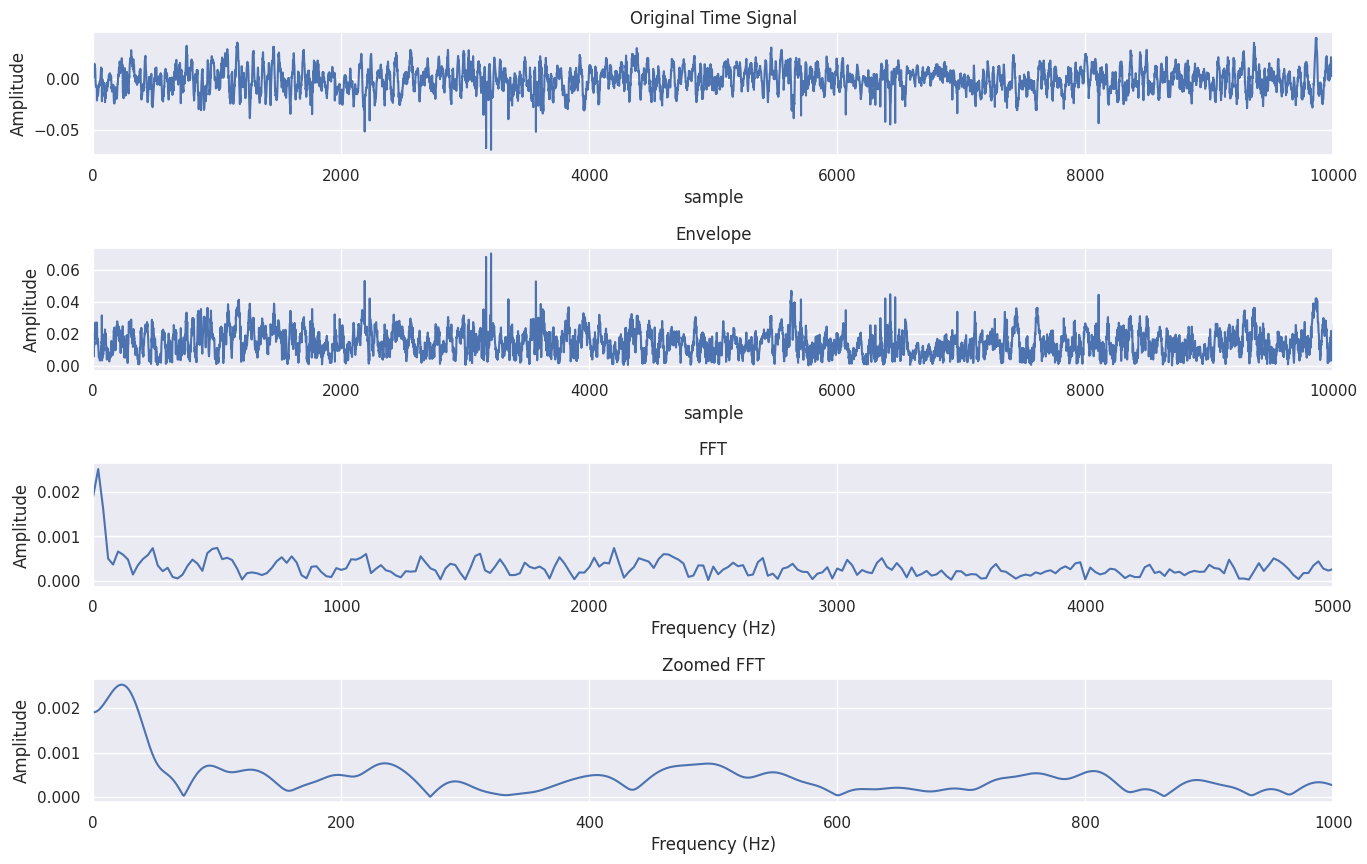

In [18]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

fig, axes = plt.subplots(4, 1, figsize = (16, 10))

sns.lineplot(ax=axes[0], x=range(len(signals.iloc[0,:])), y = signals.iloc[0,:])
axes[0].set_title("Original Time Signal")
axes[0].set_ylabel("Amplitude")
axes[0].set_xlabel("sample")
axes[0].set_xlim(0, 10000)

sns.lineplot(ax=axes[1], x=range(len(signals_env.iloc[0,:])), y = signals_env.iloc[0, :])
axes[1].set_title("Envelope")
axes[1].set_ylabel("Amplitude")
axes[1].set_xlabel("sample")
axes[1].set_xlim(0, 10000)


sns.lineplot(ax=axes[2], x = fft_freq_axis(10000, 200000), y = signals_env_fft.iloc[0, :])
axes[2].set_title("FFT")
axes[2].set_ylabel("Amplitude")
axes[2].set_xlabel("Frequency (Hz)")
axes[2].set_xlim(0, 5000)


sns.lineplot(ax=axes[3], x = zoomed_fft_freq_axis(0, 1000, 2000), y = signals_env_ZoomedFFT.iloc[0, :])
axes[3].set_title("Zoomed FFT")
axes[3].set_ylabel("Amplitude")
axes[3].set_xlabel("Frequency (Hz)")
axes[3].set_xlim(0, 1000)


plt.subplots_adjust(hspace = 0.75)
fig.show()

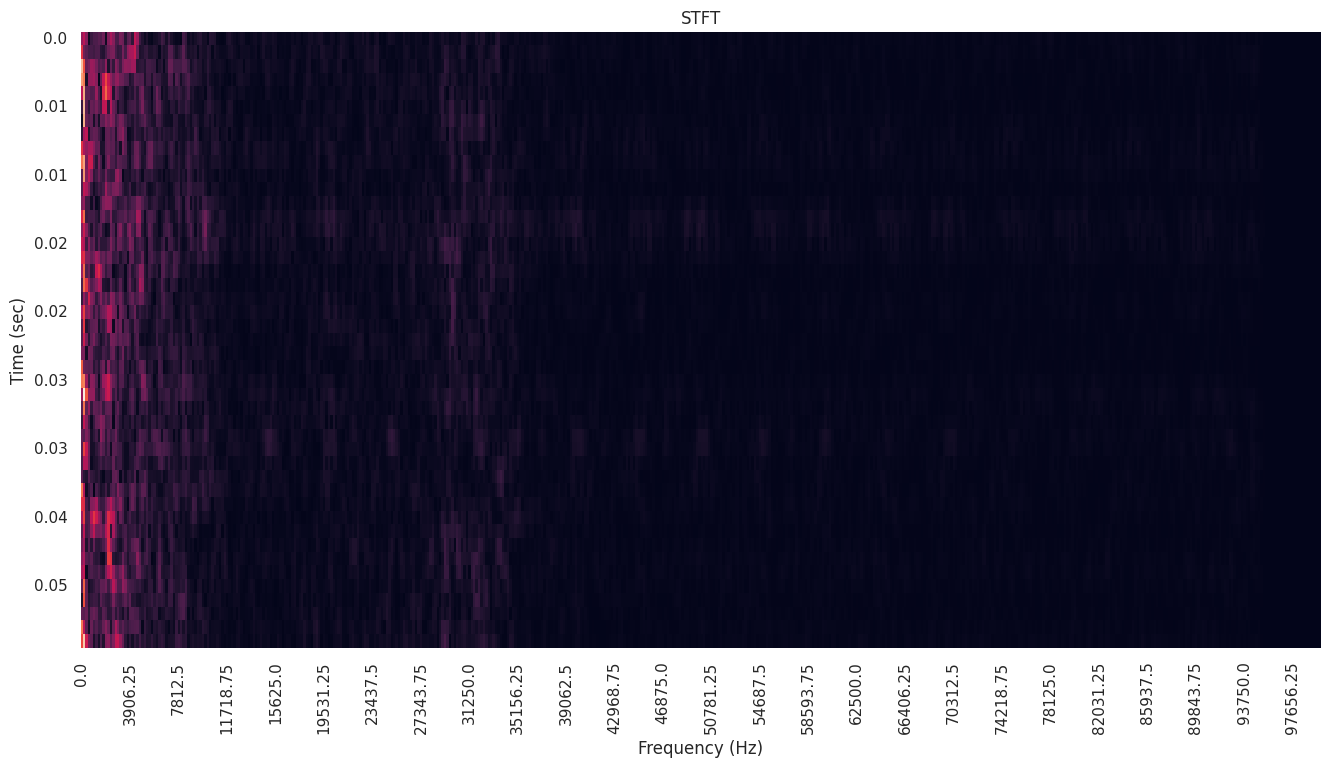

In [19]:
t = np.linspace(0, 1/20, 45)
f = fft_freq_axis(1024, 200000)

fig, ax = plt.subplots(figsize = (16, 8))

ax = sns.heatmap(signals_env_STFT[0, :, :], xticklabels = np.round(f, decimals = 2), yticklabels = np.round(t, decimals = 2), annot = False, cbar = False)
ax.set(xlabel = 'Frequency (Hz)', ylabel = 'Time (sec)')
ax.set_title('STFT')
ax.set_xticks(ax.get_xticks()[::20])
ax.set_yticks(ax.get_yticks()[::5])


fig.show()